In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

In [2]:
# глобальные переменные, которые нам нужны для генерации всех шумов. Можно обойтись и без них.

duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц

In [3]:
# счиетаем, сколько элементов будем генерировать. 
#Не забываем привести к инту, так как и длительность (duration) и частота (sample_rate) могут быть вещественными

num_samples = int(duration * sample_rate)

Белый шум

In [11]:
white_noise_simple = np.random.random(num_samples)

print(white_noise_simple)

[0.43722771 0.48079291 0.77895608 ... 0.44214268 0.06062008 0.18137041]


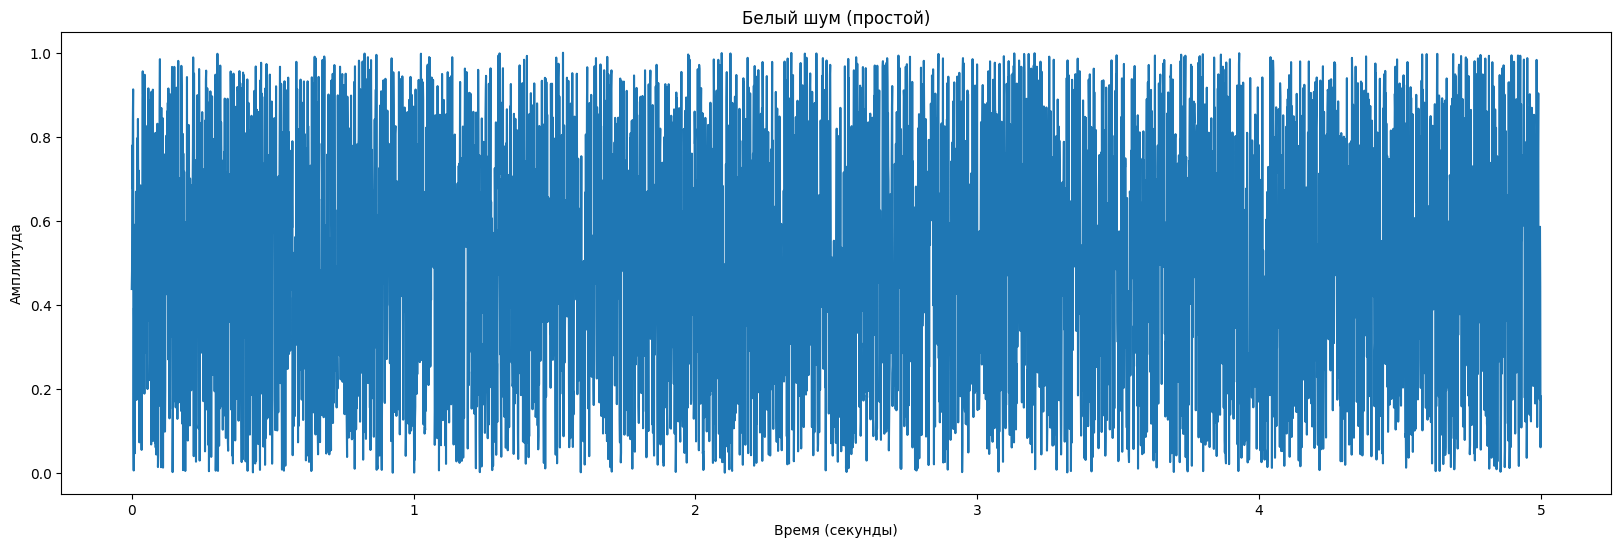

In [27]:
# отрисовываем, что получилось

# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(white_noise_simple)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, white_noise_simple)

# заголовки
plt.title('Белый шум (простой)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [28]:
# слушаем, что получилось
sd.play(white_noise_simple, sample_rate)
sd.wait()

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


<sounddevice.CallbackFlags: output underflow>

Гауссовский белый шум

In [29]:
# loc - медиана
# scale - стандартная девиация

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples)

print(white_noise_g)

[ 0.97791338 -0.33754238  0.59207434 ...  2.4245932   0.36466627
 -0.47646676]


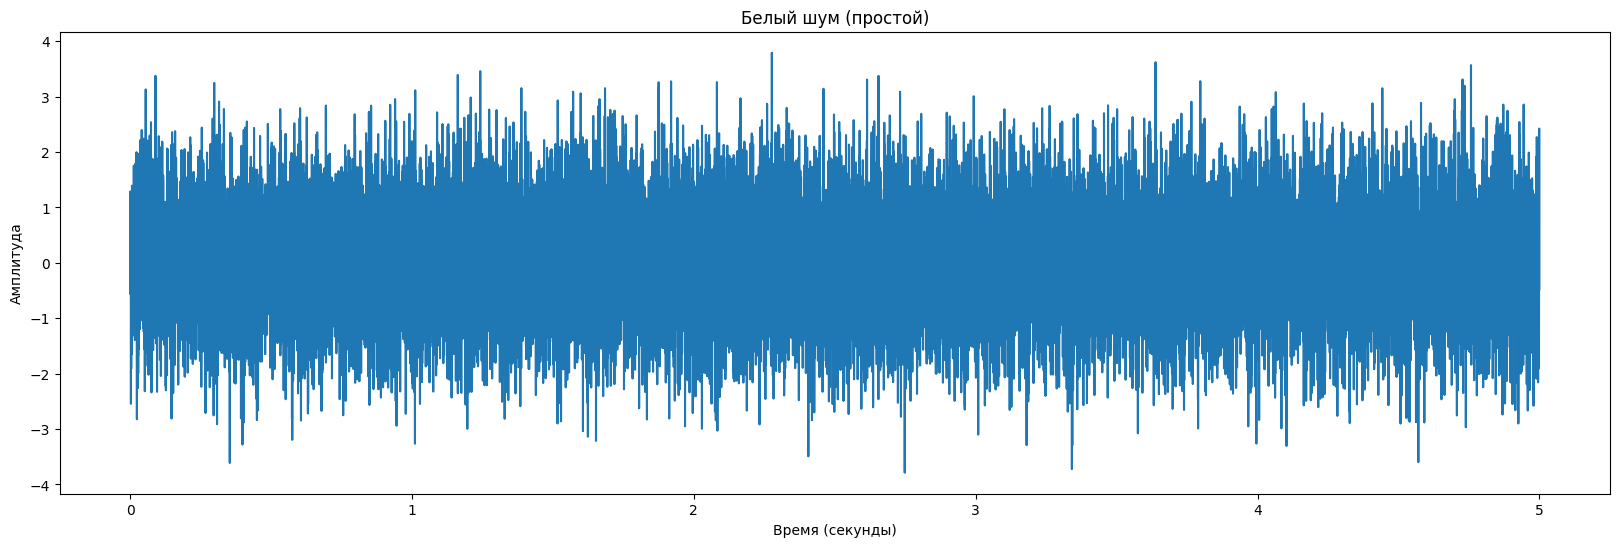

In [30]:
# отрисовываем, что получилось

# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(white_noise_g)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, white_noise_g)

# заголовки
plt.title('Белый шум (простой)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [9]:
# слушаем, что получилось
sd.play(white_noise_g, sample_rate)
sd.wait()

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


<sounddevice.CallbackFlags: output underflow>

Генерация розового шума путем применения преобразования Фурье к гауссовскому белому шуму

In [36]:
spectrum = np.fft.rfft(white_noise_g)
frequencies = np.fft.rfftfreq(num_samples, 1/sample_rate)
pink_spectrum = np.real(spectrum) / np.sqrt(np.abs(frequencies))
pink_spectrum[frequencies == 0] = np.median(pink_spectrum)
pink_noise = np.fft.ifft(pink_spectrum)
pink_noise = np.real(pink_noise)

print(pink_noise)

[-0.00785519 -0.01442233 -0.03299065 ... -0.10451598 -0.03299065
 -0.01442233]


/tmp/ipykernel_5381/750888218.py:3: RuntimeWarning: divide by zero encountered in divide
  pink_spectrum = np.real(spectrum) / np.sqrt(np.abs(frequencies))


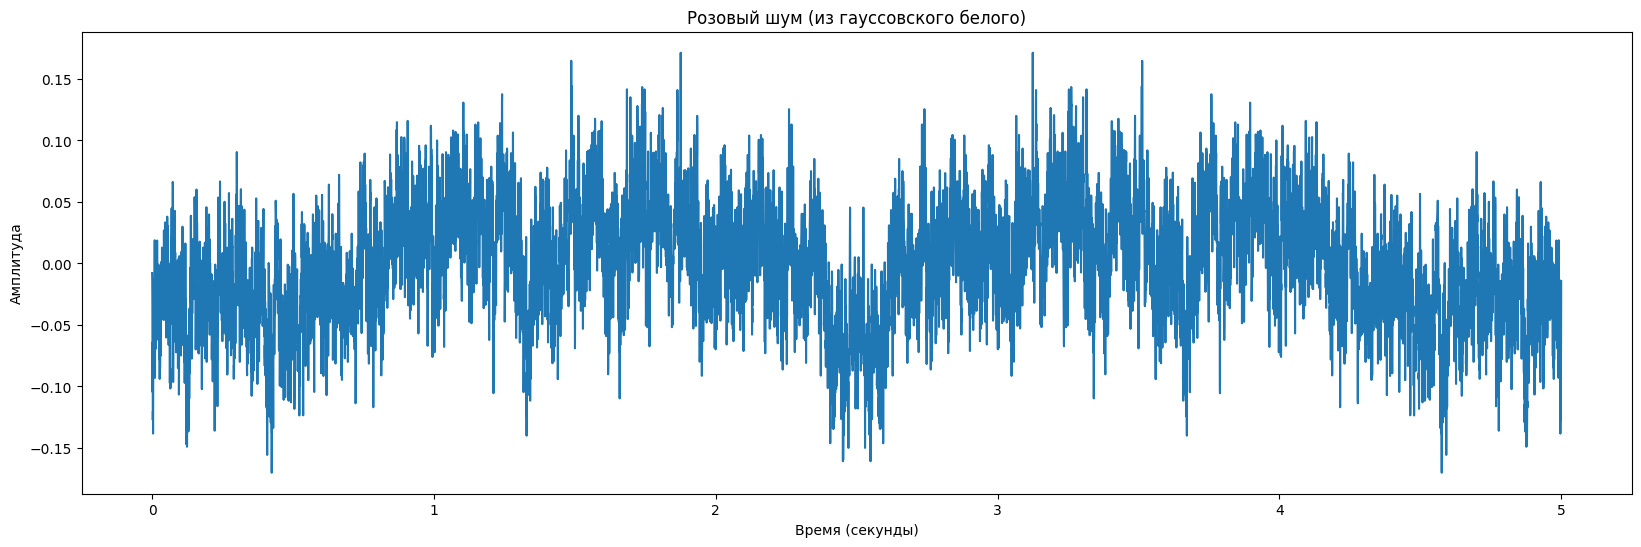

In [32]:
# отрисовываем, что получилось

# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(pink_noise)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, pink_noise)

# заголовки
plt.title('Розовый шум (из гауссовского белого)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [29]:
# слушаем, что получилось
sd.play(pink_noise, sample_rate)
sd.wait()

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


<sounddevice.CallbackFlags: output underflow>

Генерация розового шума путем применения преобразования Фурье к белому шуму

In [47]:
spectrum = np.fft.rfft(white_noise_simple)
frequencies = np.fft.rfftfreq(num_samples, 1/sample_rate)
pink_spectrum = np.real(spectrum) / np.sqrt(np.abs(frequencies))
pink_spectrum[frequencies == 0] = np.median(pink_spectrum)
pink_noise = np.fft.ifft(pink_spectrum)
pink_noise = np.real(pink_noise)

print(pink_noise)

ValueError: operands could not be broadcast together with shapes (2501,) (10251,) 

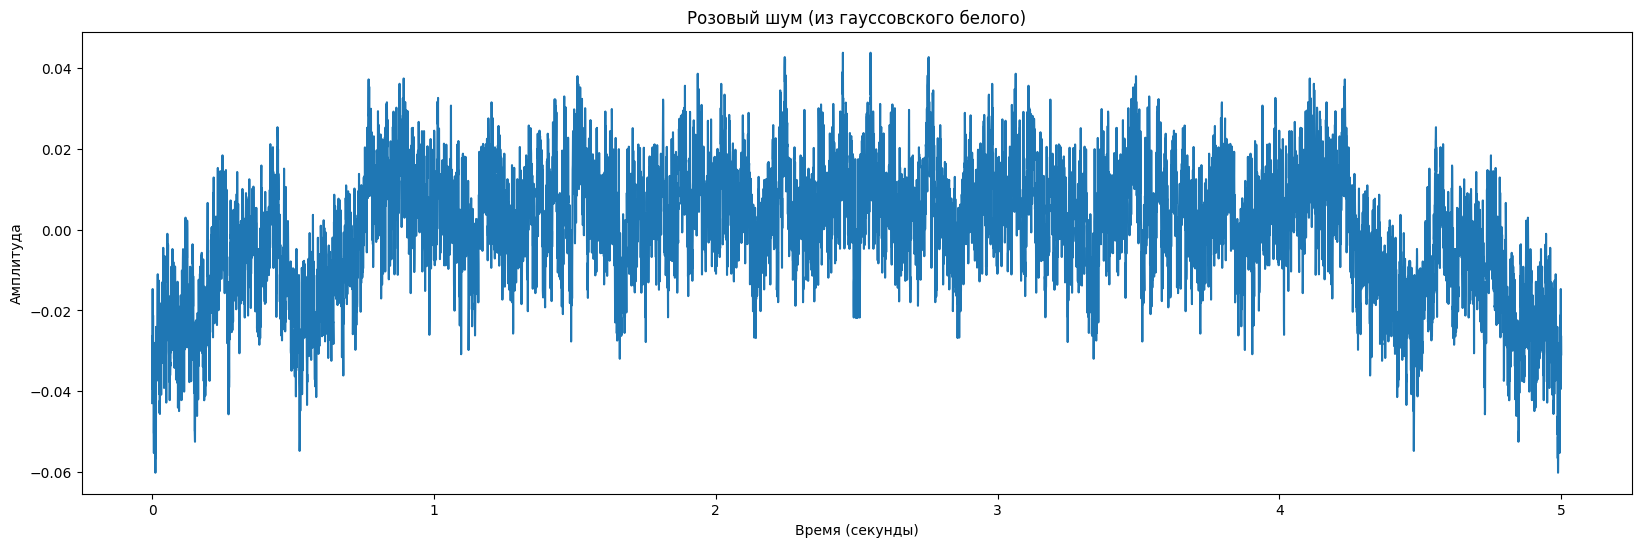

In [32]:
# отрисовываем, что получилось

# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(pink_noise)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, pink_noise)

# заголовки
plt.title('Розовый шум (из гауссовского белого)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [33]:
# слушаем, что получилось
sd.play(pink_noise, sample_rate)
sd.wait()

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


<sounddevice.CallbackFlags: output underflow>

Генерация черного шума, как шума абсолютно черного тела при температуре 17 нанокельвинов

In [6]:
import scipy

kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c


T = 17*1/np.power(10, 9)  #Температура 17 нанокельвинов
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq1 = 1000

# количество элементов в записи сигнала. Для 17 нанокельвинов полоса пропускания шума будет от 1Гц до 12 кГц
num_samples = int(duration * freq1)

# Частоты, на которых будем генерировать

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось

black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10 # эквалайзер

black_noise = white_noise_g + eq # применяем преобразование к белому шуму

black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]

print(black_noise)                                         

[-0.9928312  -0.98918627 -0.98840596 ... -0.99129278 -0.99231615
 -0.98971325]


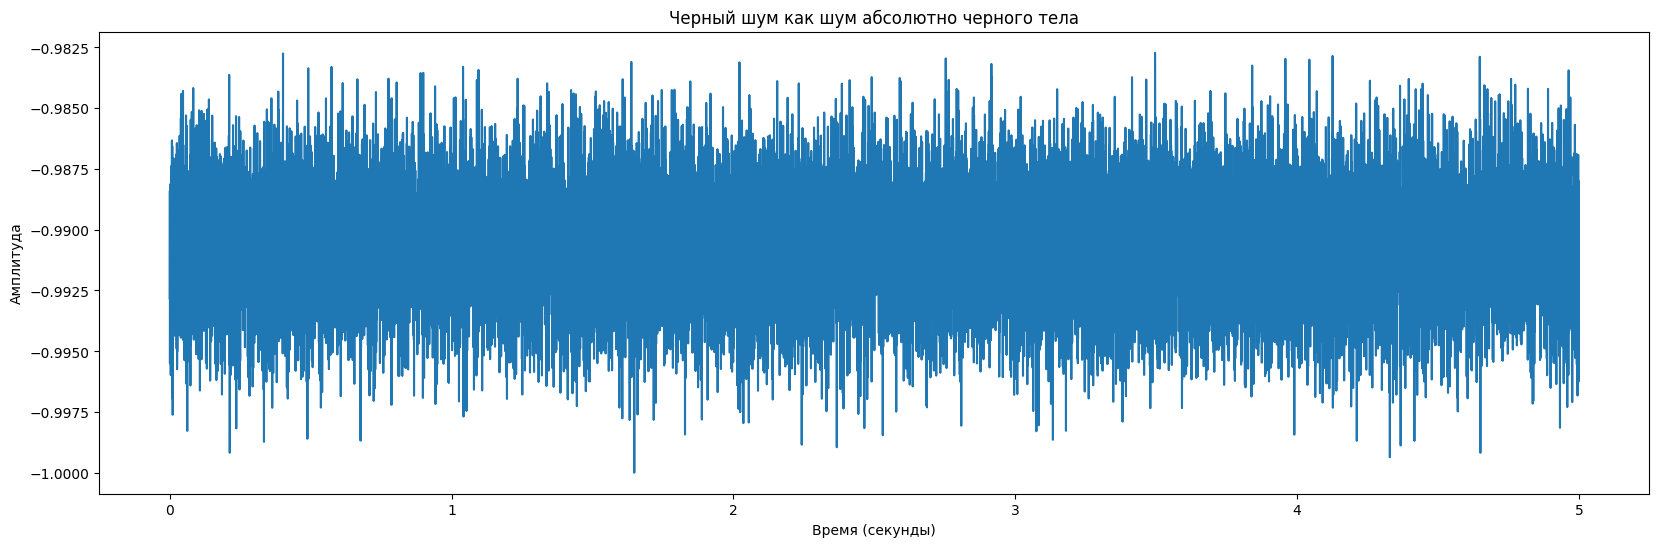

In [8]:
# отрисовываем, что получилось

# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(black_noise)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, black_noise)

# заголовки
plt.title('Черный шум как шум абсолютно черного тела')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [9]:
# слушаем, что получилось
sd.play(black_noise, sample_rate)
sd.wait()

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


<sounddevice.CallbackFlags: output underflow>

Генерация незашумленного сигнала, его зашумление и графическое представление

/tmp/ipykernel_5381/2157435395.py:41: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


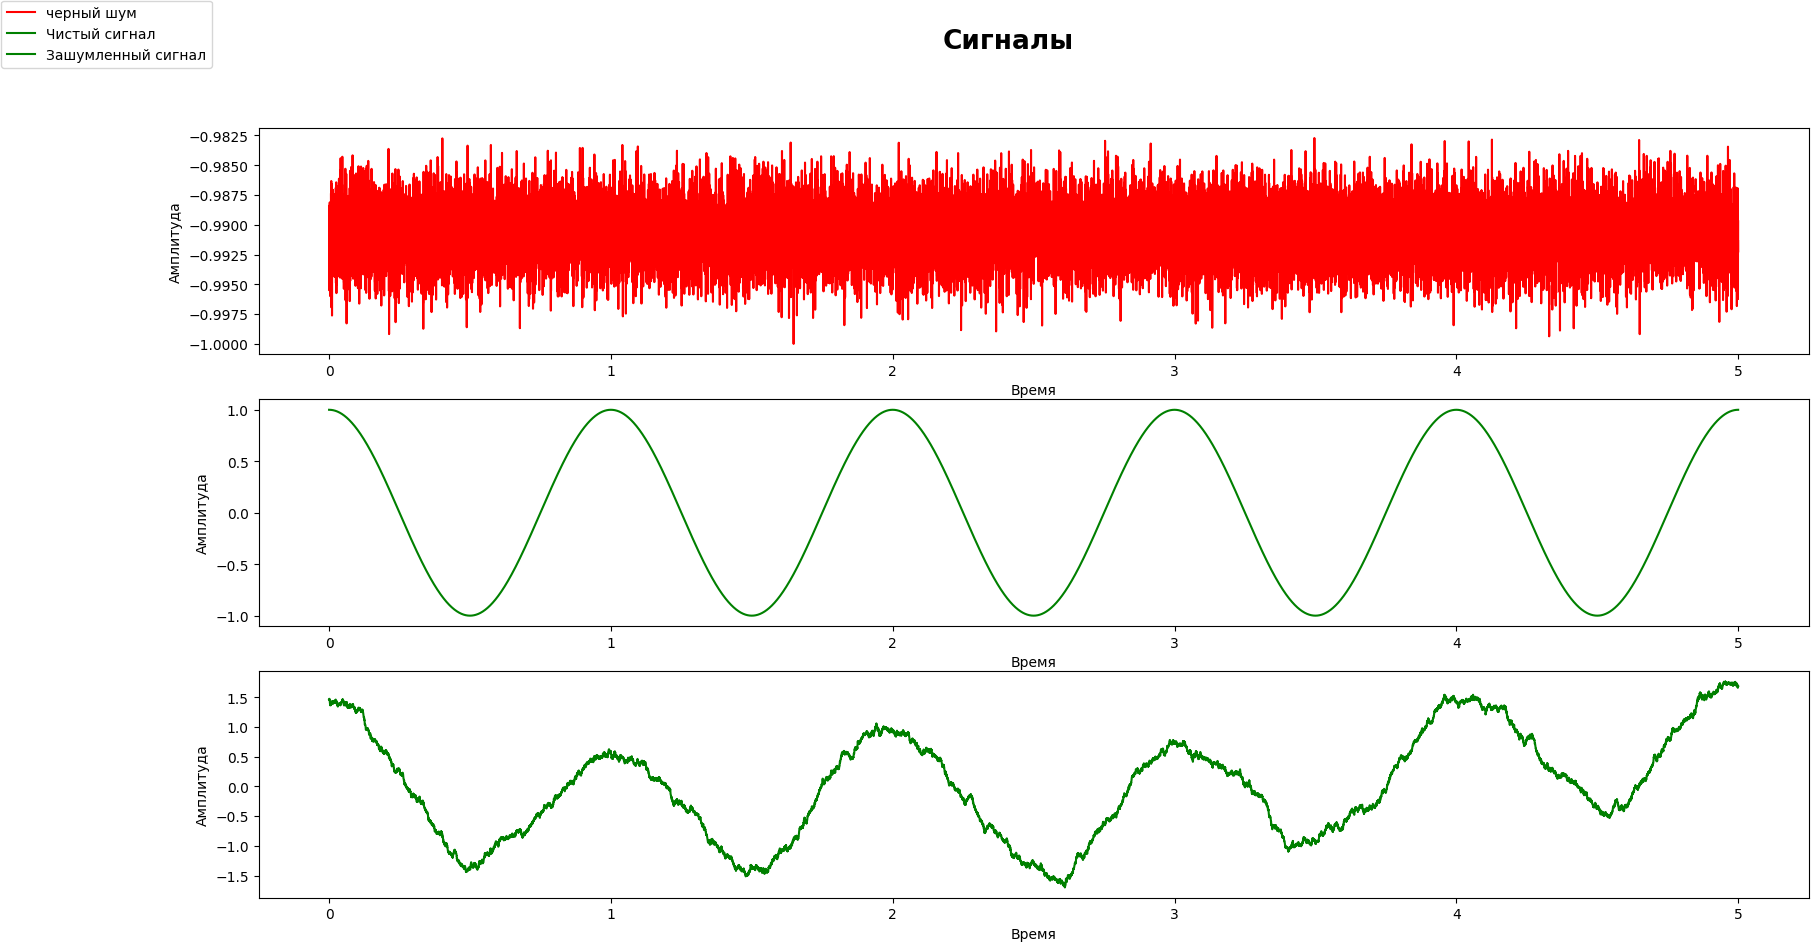

In [48]:
time_points = np.linspace(0, duration, num_samples)  # Создаем равномерные временные точки от 0 до 5 секунд

# генерим коричневый шум

cumsum = np.cumsum(white_noise_g)  # кумулятивная сумма
brown_noise = cumsum - np.mean(cumsum)  # обнуляем медианное значение
scale_coeff =  np.max(np.abs(brown_noise))   # коэффициент для масшабирования, чтобы весь ряд находился между -1 и 1

brown_noise = brown_noise / scale_coeff  # Нормализация к [-1, 1] . Каждый элемент ряда делится на масштабирующий коэффициент

values = np.cos(2*time_points*np.pi) # вычисляем амплитуды сигнала

values_noise = values + brown_noise # зашумляем сигнал

# Отрисовываем
# хотим нарисовать все на одном рисунке. Нам нужно 3 рисунка, один под другим.
fig, axs = plt.subplots(3, 1, figsize=(20, 10))


# общий заголовок для всей картинки
fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["черный шум", "Чистый сигнал", "Зашумленный сигнал"]

# определяем, что будем отрисовывать на 1 графике. По x - время, по y - амплитуды
c0 = axs[0].plot(time_points, black_noise, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c2 = axs[2].plot(time_points, values_noise, color="green")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

# отрисовываем общую легенду
fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)
